# Parkinson's Disease - Hybrid Functional Petri Net (HFPN)
This script has implemented the following blocks of the HFPN for PD:
- [x] Cholesterol homeostasis
- [x] Calcium homeotasis
- [x] Energy metabolism
- [x] Lewy bodies formation

Implemented data and parameter optimisation
- [x] Cholesterol homeostasis
- [x] Calcium homeotasis
- [x] Energy metabolism
- [x] Lewy bodies formation
- [ ] ER retraction

### Add your imports

In [1]:
import os
import sys

# Only run this cell once to avoid confusion with directories
# Point this to the directory where HFPN.py is relative to your working directory
cwd = os.getcwd() # Get current working directory
root_folder = os.sep + "team-project"
# Move to 'utils' from current directory position
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "utils" + os.sep)

# Import HFPN class to work with hybrid functional Petri nets
from hfpn import HFPN

sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "parkinsons" + os.sep)
# Import initial token, firing conditions and rate functions
from initial_tokens import *
from rate_functions import *
from firing_conditions import *
from visualisation import Analysis

### Initialise an empty HFPN

In [2]:
# Initialize an empty HFPN
pn = HFPN(time_step = 0.01) #unit = s/A.U.

## Define the places by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Cholesterol homeostasis places

In [3]:
pn.add_place(it_p_chol_PM, "p_chol_PM","Chol - perinuclear region", continuous = True)
pn.add_place(it_p_chol_LE, "p_chol_LE", "Chol - late endosome", continuous = True)
pn.add_place(it_p_chol_ER, "p_chol_ER", "Chol - ER", continuous = True)
# pn.add_place(it_p_chol_extra, "p_chol_extra","Chol - extracellular", continuous = True)
pn.add_place(it_p_chol_mito, "p_chol_mito", "Chol - mitochondria", continuous = True)
pn.add_place(it_p_27OHchol_extra, "p_27OHchol_extra","27-OH chol - extracellular", continuous = True)
pn.add_place(it_p_27OHchol_intra, "p_27OHchol_intra","27-OH chol - intracellular", continuous = True)
pn.add_place(it_p_ApoEchol_extra, "p_ApoEchol_extra","ApoE - extracellular", continuous = True)
pn.add_place(it_p_ApoEchol_EE, "p_ApoEchol_EE","ApoE - Early endosome", continuous = True)
pn.add_place(it_p_7HOCA, "p_7HOCA","7-HOCA", continuous = True)
pn.add_place(it_p_preg,place_id="p_preg", label="Pregnenolon", continuous=True)
pn.add_place(it_p_24OHchol_extra,place_id="p_24OHchol_extra", label="24OHchol extra", continuous=True)
pn.add_place(it_p_24OHchol_intra,place_id="p_24OHchol_intra", label="24OHchol intra", continuous=True)

# PD specific places in cholesterol homeostasis
pn.add_place(it_p_GBA1, "p_GBA1","GBA1", continuous = False)
pn.add_place(it_p_ABCGA1, "p_ABCGA1", "ABG(C/G)A1", continuous = False)
pn.add_place(it_p_SNCA_act_extra, "p_SNCA_act_extra","a-synuclein - extracellular", continuous = True)
pn.add_place(it_p_SNCAApoEchol_extra, "p_SNCAApoEchol_extra","a-synuclein-ApoE complex - extracellular", continuous = True)
pn.add_place(it_p_SNCAApoEchol_intra, "p_SNCAApoEchol_intra","a-synuclein-ApoE complex - intracellular", continuous = True)

### Energy metabolism places

In [4]:
pn.add_place(it_p_ROS_mito, "p_ROS_mito", "ROS - mitochondria", continuous = True)
pn.add_place(it_p_H2O_mito, "p_H2O_mito", "H2O - mitochondria", continuous = True)
pn.add_place(it_p_reduc_mito, "p_reduc_mito", "Reducing agents - mitochondria", continuous = True)
pn.add_place(it_p_cas3, "p_cas3","caspase 3 - mitochondria", continuous = True)
pn.add_place(it_p_DJ1, "p_DJ1","DJ1 mutant", continuous = True)


### Calcium homeostasis places

In [5]:
pn.add_place(it_p_Ca_cyto, "p_Ca_cyto", "Ca - cytosole", continuous = True)
pn.add_place(it_p_Ca_mito, "p_Ca_mito","Ca - mitochondria", continuous = True)
pn.add_place(it_p_Ca_ER, "p_Ca_ER", "Ca - ER", continuous = True)
pn.add_place(it_p_ADP, "p_ADP","ADP - Calcium ER import", continuous = True)
pn.add_place(it_p_ATP, "p_ATP","ATP - Calcium ER import", continuous = True)

# Discrete on/of-switches calcium pacemaking

pn.add_place(1, "p_Ca_extra", "on1 - Ca - extracellular", continuous = False)
pn.add_place(0, "p_on2","on2", continuous = False)
pn.add_place(0, "p_on3","on3", continuous = False)
pn.add_place(0, "p_on4","on4", continuous = False)

### Lewy bodies pathology places

In [6]:
pn.add_place(it_p_SNCA_act, "p_SNCA_act","SNCA - active", continuous = True)
pn.add_place(it_p_VPS35, "p_VPS35", "VPS35", continuous = True)
pn.add_place(it_p_SNCA_inact, "p_SNCA_inact", "SNCA - inactive", continuous = True)
pn.add_place(it_p_SNCA_olig, "p_SNCA_olig", "SNCA - Oligomerised", continuous = True)
pn.add_place(it_p_LB, "p_LB", "Lewy body", continuous = True)
pn.add_place(it_p_Fe2, "p_Fe2", "Fe2 iron pool", continuous = True)

### Late endosome pathology places


In [7]:
pn.add_place(it_p_LRRK2_mut, "p_LRRK2_mut","LRRK2 - mutated", continuous = True)
# Monomeric RTN3 (cycling between axonal and perinuclear regions)
pn.add_place(it_p_RTN3_axon, place_id="p_RTN3_axon", label="monomeric RTN3 (axonal)", continuous=True)
pn.add_place(it_p_RTN3_PN, place_id="p_RTN3_PN", label="monomeric RTN3 (perinuclear)", continuous=True)

# HMW RTN3 (cycling between different cellular compartments)
pn.add_place(it_p_RTN3_HMW_cyto, place_id="p_RTN3_HMW_cyto", label="HMW RTN3 (cytosol)", continuous=True)
pn.add_place(it_p_RTN3_HMW_auto, place_id="p_RTN3_HMW_auto", label="HMW RTN3 (autophagosome)", continuous=True)
pn.add_place(it_p_RTN3_HMW_lyso, place_id="p_RTN3_HMW_lyso", label="HMW RTN3 (degraded in lysosome)", continuous=True)
pn.add_place(it_p_RTN3_HMW_dys1, place_id="p_RTN3_HMW_dys1", label="HMW RTN3 (type I/III dystrophic neurites)", continuous=True)
pn.add_place(it_p_RTN3_HMW_dys2, place_id="p_RTN3_HMW_dys2", label="HMW RTN3 (type II dystrophic neurites)", continuous=True)

# Two places that are NOT part of this subpathway, but are temporarily added for establishing proper connections
# They will be removed upon merging of subpathways
pn.add_place(it_p_tau, place_id="p_tau", label = "Unphosphorylated tau", continuous = True)
pn.add_place(it_p_tauP, place_id="p_tauP", label = "Phosphorylated tau", continuous = True)

## Define the transitions by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Late endosome pathology transitions


In [8]:
pn.add_transition_with_michaelis_menten(transition_id = 't_phos_tau',
                    label = 'Phosphorylation of tau',
                    Km = Km_t_phos_tau, 
                    vmax = kcat_t_phos_tau, 
                    input_place_ids = ['p_tau', 'p_SNCA_act'],
                    substrate_id = 'p_tau',
                    consumption_coefficients = [1, 0],
                    output_place_ids = ['p_tauP'],
                    production_coefficients = [1],
                    vmax_scaling_function = vmax_scaling_t_phos_tau)

pn.add_transition_with_michaelis_menten(transition_id = 't_dephos_tauP',
                    label = 'Dephosphorylation of tau protein',
                    Km = Km_t_dephos_tauP, 
                    vmax = vmax_t_dephos_tauP, 
                    input_place_ids = ['p_tauP', 'p_Ca_cyto'],
                    substrate_id = 'p_tauP',
                    consumption_coefficients = [1, 0],
                    output_place_ids = ['p_tau'],
                    production_coefficients = [1],
                    vmax_scaling_function = vmax_scaling_t_dephos_tauP)

pn.add_transition_with_speed_function(
                    transition_id = 't_RTN3_exp',
                    label = 'Expression rate of RTN3',
                    input_place_ids = [], 
                    firing_condition = fc_t_RTN3_exp,
                    reaction_speed_function = r_t_RTN3_exp, 
                    consumption_coefficients = [],
                    output_place_ids = ['p_RTN3_PN'],
                    production_coefficients = [1])

pn.add_transition_with_speed_function(
                    transition_id = 't_LE_retro',
                    label = 'retrograde transport of LEs & ER',
                    input_place_ids = ['p_ATP','p_chol_LE','p_RTN3_axon', 'p_tau','p_LRRK2_mut','p_LB'], 
                    firing_condition = fc_t_LE_retro,
                    reaction_speed_function = r_t_LE_retro, 
                    consumption_coefficients = [ATPcons_t_LE_trans, 0, 1, 0,0,0],
                    output_place_ids = ['p_ADP','p_RTN3_PN'],
                    production_coefficients = [ATPcons_t_LE_trans, 1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_LE_antero',
                    label = 'anterograde transport of LEs & ER',
                    input_place_ids = ['p_ATP','p_RTN3_PN', 'p_tau'], # didn't connect p_tau yet
                    firing_condition = fc_t_LE_antero,
                    reaction_speed_function = r_t_LE_antero, # get later from NPCD
                    consumption_coefficients = [ATPcons_t_LE_trans, 1, 0], # tune these coefficients based on PD
                    output_place_ids = ['p_ADP','p_RTN3_axon'],
                    production_coefficients = [ATPcons_t_LE_trans, 1]) # tune these coefficients based on PD

pn.add_transition_with_speed_function(
                    transition_id = 't_RTN3_aggregation',
                    label = 'aggregation of monomeric RTN3 into HMW RTN3',
                    input_place_ids = ['p_RTN3_axon', 'p_RTN3_PN'], 
                    firing_condition = fc_t_RTN3_aggregation, # tune aggregation limit later
                    reaction_speed_function = r_t_RTN3_aggregation,
                    consumption_coefficients = [1, 1],
                    output_place_ids = ['p_RTN3_HMW_cyto'],
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_RTN3_auto',
                    label = 'functional autophagy of HMW RTN3',
                    input_place_ids = ['p_RTN3_HMW_cyto', 'p_RTN3_axon'], 
                    firing_condition = fc_t_RTN3_auto, 
                    reaction_speed_function = r_t_RTN3_auto,
                    consumption_coefficients = [1, 0],
                    output_place_ids = ['p_RTN3_HMW_auto'],
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_RTN3_lyso',
                    label = 'functional delivery of HMW RTN3 to the lysosome',
                    input_place_ids = ['p_RTN3_HMW_auto', 'p_tau'], 
                    firing_condition = fc_t_RTN3_lyso, 
                    reaction_speed_function = r_t_RTN3_lyso,
                    consumption_coefficients = [1, 0],
                    output_place_ids = ['p_RTN3_HMW_lyso'],
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_RTN3_dys_auto',
                    label = 'dysfunctional autophagy of HMW RTN3',
                    input_place_ids = ['p_RTN3_HMW_cyto', 'p_RTN3_axon'], 
                    firing_condition = fc_t_RTN3_dys_auto, 
                    reaction_speed_function = r_t_RTN3_dys_auto,
                    consumption_coefficients = [1, 0],
                    output_place_ids = ['p_RTN3_HMW_dys1'],
                    production_coefficients = [1]) # tune later when data are incorporated

pn.add_transition_with_speed_function(
                    transition_id = 't_RTN3_dys_lyso',
                    label = 'dysfunctional delivery of HMW RTN3 to the lysosome',
                    input_place_ids = ['p_RTN3_HMW_auto', 'p_RTN3_HMW_dys1', 'p_tau'], 
                    firing_condition = fc_t_RTN3_dys_lyso, 
                    reaction_speed_function = r_t_RTN3_dys_lyso,
                    consumption_coefficients = [1, 0, 0],
                    output_place_ids = ['p_RTN3_HMW_dys2'],
                    production_coefficients = [1]) # tune later when data are incorporated

## Run the network and plot a time evolution of the system

In [9]:
pn.reset_network()

In [10]:
pn.run_many_times(number_runs=1, number_time_steps=500000) 
analysis = Analysis(pn)


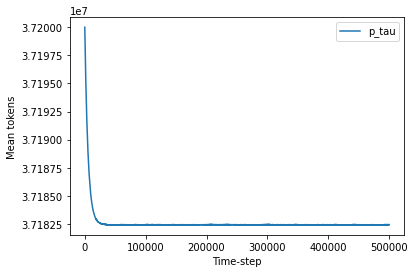

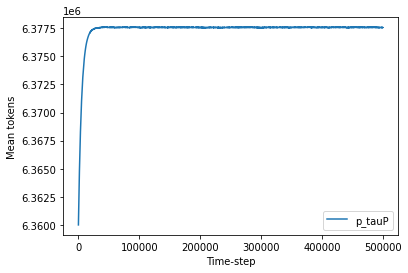

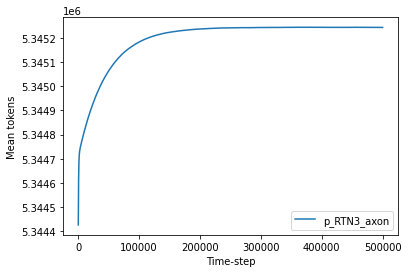

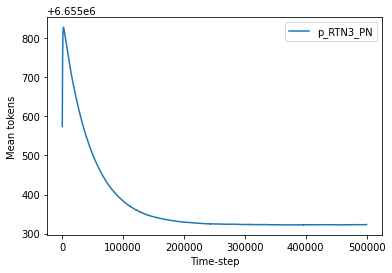

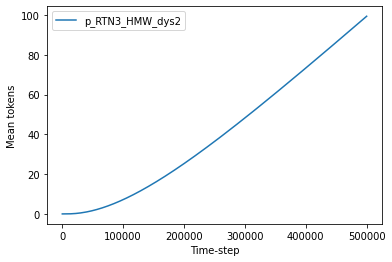

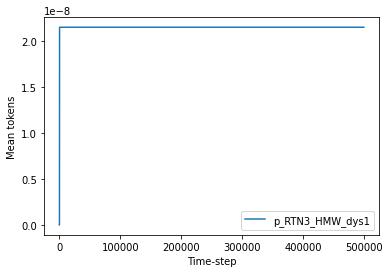

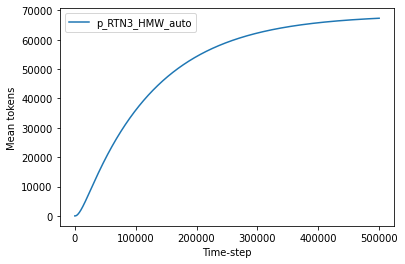

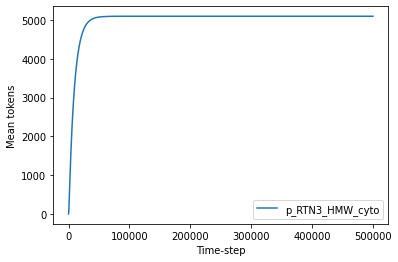

In [11]:
analysis.mean_run_tokens_over_time(["p_tau"])
analysis.mean_run_tokens_over_time(["p_tauP"])
analysis.mean_run_tokens_over_time(["p_RTN3_axon"])
analysis.mean_run_tokens_over_time(["p_RTN3_PN"])
analysis.mean_run_tokens_over_time(["p_RTN3_HMW_dys2"])
analysis.mean_run_tokens_over_time(["p_RTN3_HMW_dys1"])
analysis.mean_run_tokens_over_time(["p_RTN3_HMW_auto"])
analysis.mean_run_tokens_over_time(["p_RTN3_HMW_cyto"])

In [12]:
import numpy as np
mean = np.mean(analysis.token_storage[:,500000:,analysis.place_dict["p_RTN3_axon"]])
print(mean)
mean = np.mean(analysis.token_storage[:,500000:,analysis.place_dict["p_RTN3_PN"]])
print(mean)

5345242.966123966
6655322.955343199
